In [1]:
import sys
sys.path.append('../code')

In [2]:
import warnings
warnings.filterwarnings("ignore")
#loading useful libraries
import pandas as pd
import os
import pickle
from dataset import apply_stratified_framework, get_targets

from plot import plot_PRC, plot_roc
from test_models import get_results

loading our sample data from the dataset folder

In [3]:
try: 
    os.mkdir('../plots') 
except OSError as error: 
    print(error) 

In [4]:
test= pd.read_csv("../dataset/testB.csv")

In [5]:
Complications = ['Elevated_troponin','Elevated_d-dimer','Elevated_Amino','Elevated_IL6','SBI','AKI','ARDS']

In [6]:
framework_test =apply_stratified_framework(test,Complications)

In [7]:
targets=get_targets(Complications)
train_columns = [x for x in test.columns if x not in targets]

loading trained models from "Trained models" folder

In [8]:
trained_models = {}
for c in Complications:
    models_for_complication= []
    for i in range(6):
        pkl_filename = "../trained models/"+c+"_"+str(i)+".pkl"
        with open(pkl_filename, 'rb') as file:
                    pickle_model = pickle.load(file)
        models_for_complication.append(pickle_model)
    models_for_complication
    trained_models[c]= models_for_complication

get performance results of our trained models on the sample data

In [9]:
true_ouctomes,predicted_ouctomes = get_results(framework_test,Complications,trained_models,train_columns)

predicting Elevated_troponin
AUPRC
CI 95% 0.674 ( 0.441 , 0.905 )
AUC 
CI 95% 0.913 ( 0.81 , 0.994 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting Elevated_d-dimer
AUPRC
CI 95% 0.235 ( 0.12 , 0.403 )
AUC 
CI 95% 0.714 ( 0.604 , 0.808 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting Elevated_Amino
AUPRC
CI 95% 0.396 ( 0.22 , 0.614 )
AUC 
CI 95% 0.808 ( 0.691 , 0.898 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting Elevated_IL6
AUPRC
CI 95% 0.776 ( 0.628 , 0.899 )
AUC 
CI 95% 0.899 ( 0.805 , 0.972 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting SBI
AUPRC
CI 95% 0.612 ( 0.365 , 0.835 )
AUC 
CI 95% 0.843 ( 0.698 , 0.958 )
Calcualing 95% Confidence Intervals
-------------------------------------------
predicting AKI
AUPRC
CI 95% 0.637 ( 0.33 , 0.875 )
AUC 
CI 95% 0.958 ( 0.91 , 0.99 )
Calcualing 95% Confidence Inter

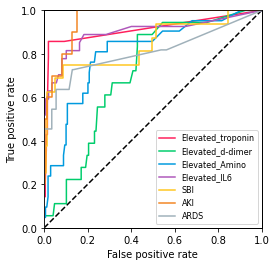

In [10]:
plot_roc(Complications,true_ouctomes,predicted_ouctomes)

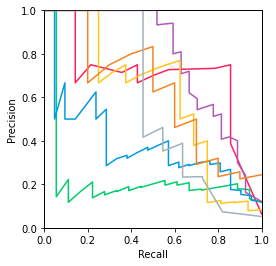

In [11]:
plot_PRC(Complications,true_ouctomes,predicted_ouctomes)